In [ ]:
import zipfile
import os

# Step 0: Unzip the dataset
zip_path = 'dataset.zip'  # Path to your zip file
extract_path = '.'  # Extract to the current directory

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if 'dataset' directory exists after extraction
if not os.path.exists('dataset'):
    raise FileNotFoundError("The 'dataset' directory was not found after unzipping. Please check the zip file or the extraction path.")

# Now proceed with the rest of your script...

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Load and augment your data
train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 34 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate

# Input layer
inputs = Input(shape=(224, 224, 3))

# Branch 1: 3x3 filters
branch1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
branch1 = MaxPooling2D((2, 2))(branch1)
branch1 = Dropout(0.25)(branch1)

# Branch 2: 5x5 filters
branch2 = Conv2D(64, (5, 5), activation='relu', padding='same')(inputs)
branch2 = MaxPooling2D((2, 2))(branch2)
branch2 = Dropout(0.25)(branch2)

# Branch 3: 7x7 filters
branch3 = Conv2D(64, (7, 7), activation='relu', padding='same')(inputs)
branch3 = MaxPooling2D((2, 2))(branch3)
branch3 = Dropout(0.25)(branch3)

# Concatenate all branches
merged = concatenate([branch1, branch2, branch3])

# Deep Neural Network after concatenation
x = Flatten()(merged)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)  # For binary classification

# Model instantiation
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 64)   │          4,864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 224, 224, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 64)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 112, 112, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 112, 112, 64)   │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 112, 112, 64)   │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 112, 112, 64)   │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 112, 112, 64)   │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 112, 112, 192)  │              0 │ dropout[0][0],         │
│                           │                        │                │ dropout_1[0][0],       │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 2408448)        │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │    308,281,472 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout_4[0][0]        │
└──────────────────────

 Total params: 308,305,921 (1.15 GB)

 Trainable params: 308,305,921 (1.15 GB)

 Non-trainable params: 0 (0.00 B)

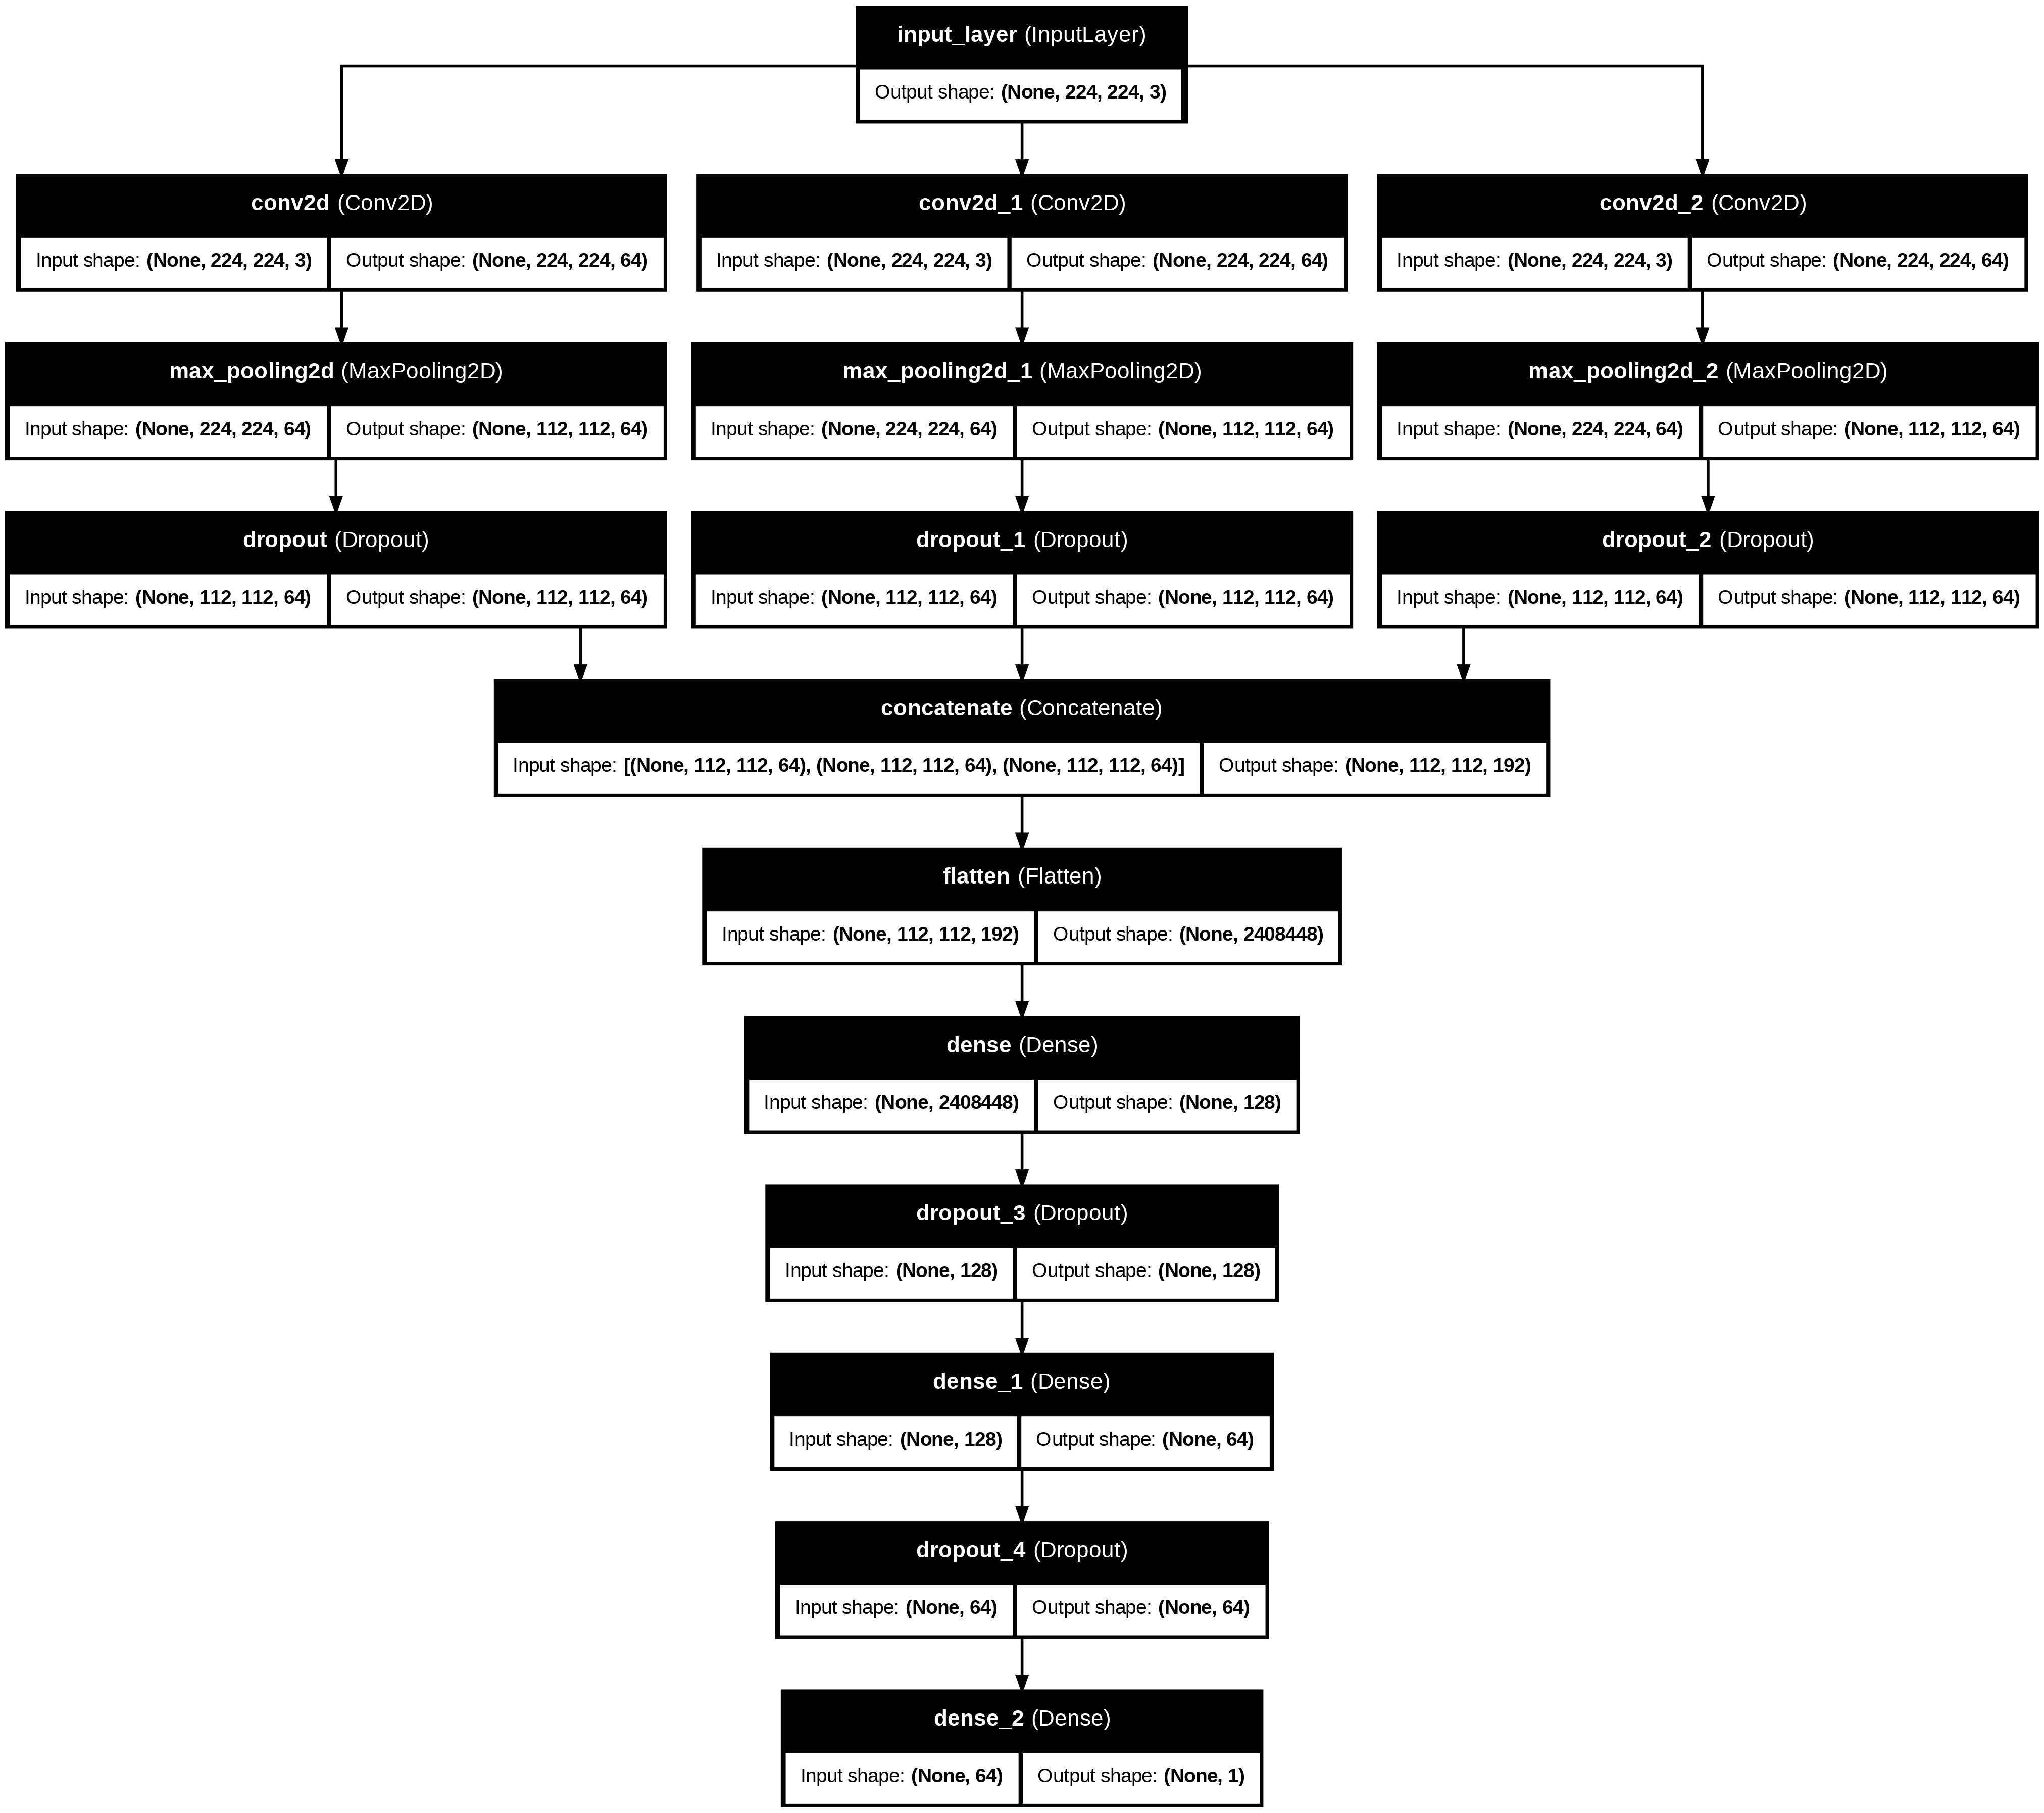

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 2.3149e-06 - val_accuracy: 0.8750 - val_loss: 0.1536
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9062 - loss: 0.1929 - val_accuracy: 0.8750 - val_loss: 0.1994
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8750 - val_loss: 0.2412
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 1.0000 - loss: 0.0605 - val_accuracy: 0.8750 - val_loss: 0.2638
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step - accuracy: 0.9375 - loss: 0.0553 - val_accuracy: 0.8750 - val_loss: 0.2325
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8750 - val_loss: 0.2687
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.8750 - val_loss: 0.2682
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.8750 - val_loss: 0.2696


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
# Evaluate the model on the validation set to get predictions
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary predictions

# Get true labels
y_true = validation_generator.classes

# Generate the classification report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

       lemon       0.40      0.50      0.44         4
       melon       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8

